In [58]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
#importing modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [60]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [61]:
from google.colab import drive
drive.mount('/content/drive/',force_remount = True)

Mounted at /content/drive/


In [62]:
#mounting the files from google drive to colab and renaming and reading them
path1 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/E1_train.csv'
path2 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/D2_train.csv'
path3 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/W3_train.csv'
path4 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/S4_train.csv'
path5 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/L5_train.csv'
path6 ='/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RS6_train.csv'
path7 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RL7_train.csv'
path8 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/G8_train.csv'
path9 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/I9_train.csv'
eating = pd.read_csv(path1)
drinking = pd.read_csv(path2)
walking = pd.read_csv(path3)
standing = pd.read_csv(path4)
lying = pd.read_csv(path5)
rs = pd.read_csv(path6)
rl = pd.read_csv(path7)
grooming = pd.read_csv(path8)
idle = pd.read_csv(path9)

In [63]:
#concatinating all the dataframes into a single dataframe and checking the number of rows and columns in the final dataframe
df = pd.concat([eating,drinking,walking,standing,lying,rs,rl,grooming,idle])
df.shape

(12263524, 11)

In [64]:
#checking the data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 405262
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


In [65]:
#checking the statistical parameters of values in df
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07
mean,1.628243e+09,-2.807402e-02,6.211683e-01,1.081455e-01,8.722215e-01,-1.837340e+00,-6.375345e-01,-2.934089e+02,4.300977e+02,2.037158e+02,4.320899e+00
std,1.205662e+05,2.622167e-01,7.084800e-01,1.888613e-01,1.282481e+01,2.014151e+01,1.030093e+01,2.736141e+02,5.969720e+02,4.382996e+02,2.417436e+00
min,1.628067e+09,-1.599756e+01,-1.314160e+01,-1.599121e+01,-1.999756e+03,-1.998779e+03,-1.999756e+03,-1.534500e+03,-1.057500e+03,-1.152000e+03,1.000000e+00
25%,1.628106e+09,-2.182617e-01,8.281250e-01,3.173830e-02,-2.014160e+00,-5.676270e+00,-2.685547e+00,-4.635000e+02,-4.950000e+01,6.900000e+01,1.000000e+00
50%,1.628312e+09,-2.490230e-02,9.370118e-01,1.230469e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.535000e+02,1.395000e+02,3.165000e+02,4.000000e+00
75%,1.628335e+09,1.616211e-01,9.736329e-01,2.006836e-01,3.723145e+00,1.892090e+00,1.464844e+00,-1.260000e+02,9.795000e+02,5.520000e+02,6.000000e+00
max,1.628421e+09,1.051514e+01,1.182617e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.973511e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


#Working using Under Sampling 

Creating a new dataframe from the original dataframe df, with the count of unique values under each output class equal to that of least value.

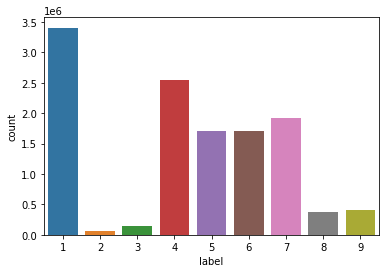

In [66]:
#creating a countplot to check the imbalance in the output class
sns.countplot(df['label'])

In [67]:
#checking the count of values under each output class
print(df['label'].value_counts(ascending=False))

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64


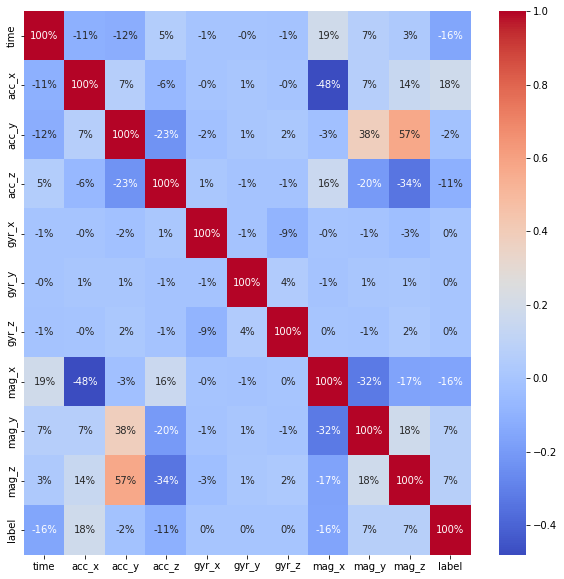

In [68]:
#checking the correlation between all the features of df1 using heatmap
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

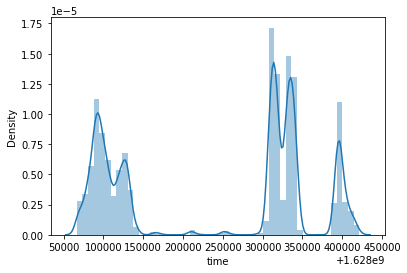

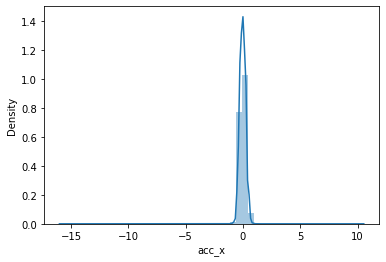

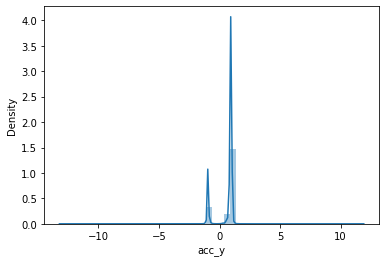

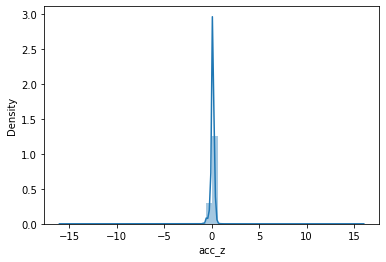

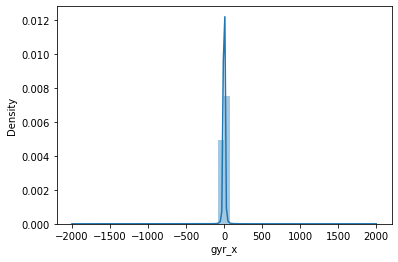

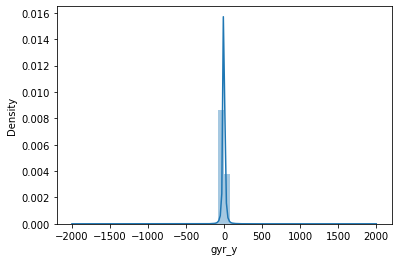

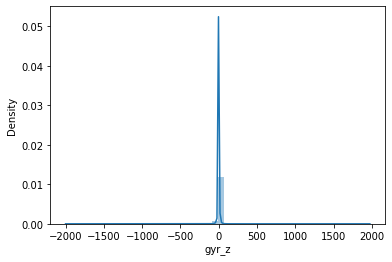

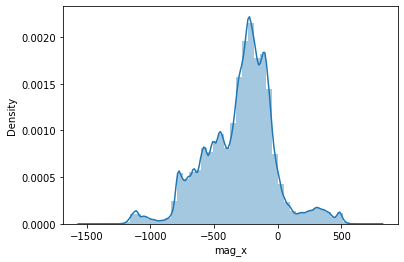

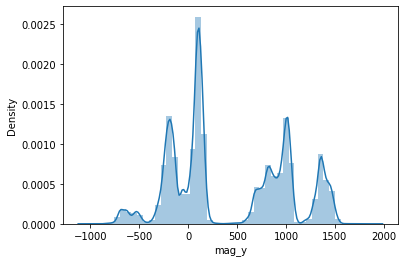

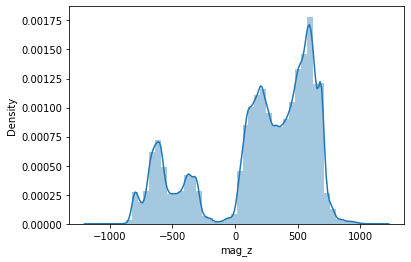

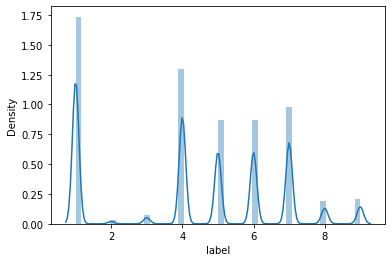

In [57]:
#checking for the distibution of data under each feature in terms of skewness etc. using distribution plot
for column in df.columns:
    plt.figure()             
    sns.distplot(df[column])

In [69]:
#splitting the input variables and output variable of dataframe df into 2 seperate dataframes
dfx = df.drop(['label'],axis = 1)
dfy = df[['label']] 

In [70]:
#rechecking the features under the dataframe with the input variables 
dfx.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,1628308980,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5
1,1628308980,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5
2,1628308980,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5
3,1628308980,0.225098,0.958008,-0.031250,19.104004,23.803711,7.019043,-297.0,1431.0,523.5
4,1628308980,0.204590,0.961426,-0.001953,15.258789,23.193359,2.807617,-286.5,1431.0,538.5


In [71]:
#rechecking the features under the dataframe with the output variable 
dfy.head()

,label
0,1
1,1
2,1
3,1
4,1


In [72]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
dfx,dfy = rus.fit_resample(dfx,dfy)

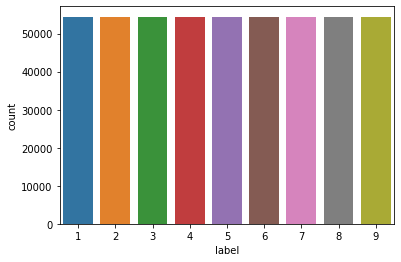

In [73]:
#recreating a countplot to check the imbalance in the output class after undersampling
sns.countplot(dfy['label'])

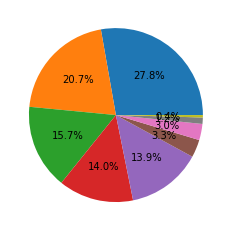

In [74]:
#checking for the proportion of counts of each unique in the output feature ' label' of df 
plt.pie(df['label'].value_counts(),autopct = '%1.1f%%');

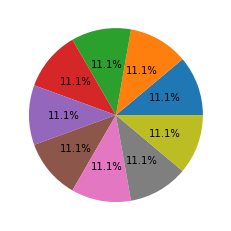

In [75]:
#re-checking for the proportion of counts of each unique in the output feature after under sampling
plt.pie(dfy['label'].value_counts(),autopct = '%1.1f%%');

In [49]:
#rechecking the count of values under each output class
print(dfy['label'].value_counts(ascending=False))

1    54439
2    54439
3    54439
4    54439
5    54439
6    54439
7    54439
8    54439
9    54439
Name: label, dtype: int64


In [52]:
#checking the shapes of dfx and dfy
print (dfx.shape)
print (dfy.shape)

(489951, 10)
(489951, 1)




1.   From the count plot and the pie chart, we see that the count of unique output variables is the same ie; 54439 after under sampling.
2.   This is reconfirmed by the above value_count command and the shapes of the dataframes dfx and dfy



  



**We shall now do the workings with the under sampled dataframes dfx and dfy

#Outlier Identification and Treatment ( Using IQR Method)

In [76]:
#giving a common name to all the features of datafram df1x, to call them in future
column_name = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z',]

In [77]:
#creating a common function to identify outliers for each feature by drawing a box plot
def identify_outliers(df1x, column_name):
    fig = plt.figure(figsize=(4,2))
    sns.boxplot(data = dfx, y = column_name)
plt.show() 

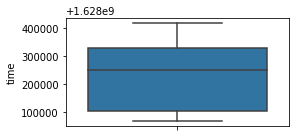

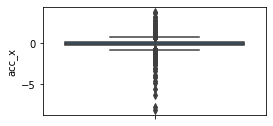

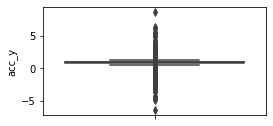

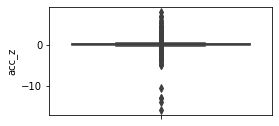

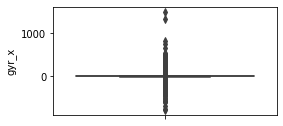

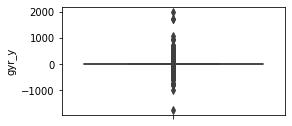

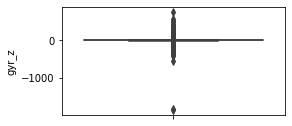

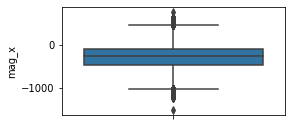

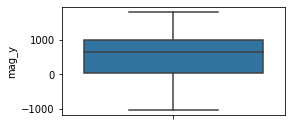

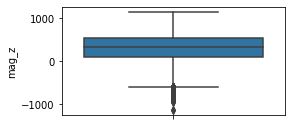

In [78]:
#identifying the outliers for each feature by calling the common function
identify_outliers(dfx, 'time')
identify_outliers(dfx, 'acc_x')
identify_outliers(dfx, 'acc_y')
identify_outliers(dfx, 'acc_z')
identify_outliers(dfx, 'gyr_x')
identify_outliers(dfx, 'gyr_y')
identify_outliers(dfx, 'gyr_z')
identify_outliers(dfx, 'mag_x')
identify_outliers(dfx, 'mag_y')
identify_outliers(dfx, 'mag_z')

In [79]:
#creating common function to replace outlier values with the median value and print boxplot thereafter to recheck the removal of outliers ; print upper and lower values of each feature 
#IQR
def replace_outliers(dfx, column_name):
        Q1 = np.percentile(dfx[column_name], 25)
        Q2 = np.percentile(dfx[column_name], 50)
        Q3 = np.percentile(dfx[column_name], 75)
        IQR = Q3 - Q1

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        dfx.loc[dfx[column_name] > upper_val, column_name] = np.median(dfx[column_name])
        dfx.loc[dfx[column_name] < lower_val, column_name] = np.median(dfx[column_name])
        
        fig = plt.figure(figsize = (4,2))
        sns.boxplot(data = dfx,y = column_name)
        plt.xticks(rotation = 'horizontal')
        plt.show()

upper 1628669742.0
lower 1627765278.0


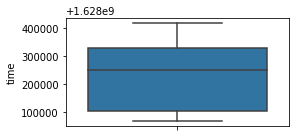

upper 0.7734376499999998
lower -0.8710939499999999


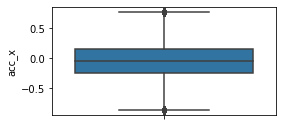

upper 1.256592
lower 0.48901360000000016


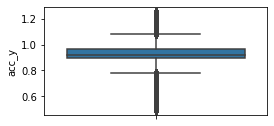

upper 0.5144044
lower -0.2727052


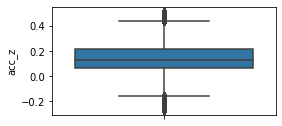

upper 11.779785
lower -10.192871


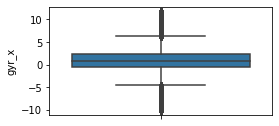

upper 12.512207
lower -16.296386599999998


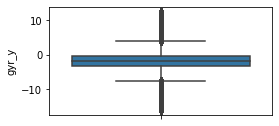

upper 7.6904296
lower -8.911132799999999


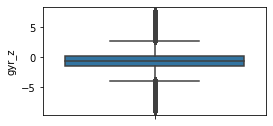

upper 447.0
lower -1029.0


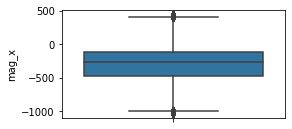

upper 2466.75
lower -1427.25


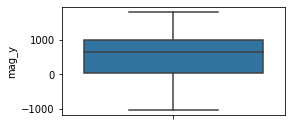

upper 1239.0
lower -609.0


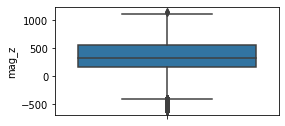

In [80]:
#recalling the common function for replacing the outliers in each feature with median value and visualising using boxplot
replace_outliers(dfx, 'time')
replace_outliers(dfx, 'acc_x')
replace_outliers(dfx, 'acc_y')
replace_outliers(dfx, 'acc_z')
replace_outliers(dfx, 'gyr_x')
replace_outliers(dfx, 'gyr_y')
replace_outliers(dfx, 'gyr_z')
replace_outliers(dfx, 'mag_x')
replace_outliers(dfx, 'mag_y')
replace_outliers(dfx, 'mag_z')

#Data Normalisation

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
dfx_normalised = pd.DataFrame(scaling.fit_transform(dfx),columns = dfx.columns)
dfx_normalised.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.065196,0.350356,0.551241,0.595282,0.812849,0.365180,0.474074,0.572154,0.653222,0.532822
1,0.056494,0.498812,0.585614,0.769088,0.013966,0.770701,0.281481,0.427846,0.664746,0.532822
2,0.697930,0.366686,0.671547,0.579764,0.324022,0.511677,0.718519,0.565041,0.398638,0.411765
3,0.058416,0.565618,0.601528,0.699566,0.502793,0.388535,0.500000,0.551829,0.298586,0.562660
4,0.082084,0.432898,0.643539,0.402235,0.960894,0.498938,0.500000,0.491870,0.654269,0.115942


#Feature Selection - KBest using Chi2 tests

In [82]:
#importing the KBest and Chi2 packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [83]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(dfx_normalised,dfy)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(dfx_normalised.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features       k_score
0     time  29113.580257
1    acc_x   6005.854010
2    acc_y   4211.219683
8    mag_y   3721.014568
7    mag_x   3605.790583
3    acc_z   1748.246366
9    mag_z    769.559798
4    gyr_x     17.907963
5    gyr_y      6.583537
6    gyr_z      2.565240


#Feature Selection using Mutual Info. Classifier

time     1.806830
mag_y    0.524462
mag_x    0.349466
acc_x    0.334123
acc_y    0.251361
mag_z    0.241695
gyr_y    0.238717
gyr_z    0.234552
acc_z    0.233298
gyr_x    0.208319
dtype: float64


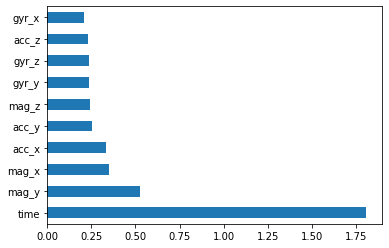

In [84]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(dfx_normalised, dfy)

mutual_data = pd.Series(mutual_info, index = dfx_normalised.columns)
mutual_data.sort_values(ascending = False)

print(mutual_data.nlargest(10))

mutual_data.nlargest(10).plot(kind = 'barh')
plt.show()

**From the above 2 methods of feature selection, we can find that the significant features are time, acc_x,acc_y,mag_x and mag_y. Hence we need to drop the insignificant features  select only the significant variables while we create the models**

In [93]:
#dropping the insignificant features among the input variables
dfx_normalised.drop(['acc_z','mag_z','gyr_x','gyr_y','gyr_z'], inplace = True, axis = 1)

In [94]:
dfx_normalised.head()

,time,acc_x,acc_y,mag_x,mag_y
0,0.065196,0.350356,0.551241,0.572154,0.653222
1,0.056494,0.498812,0.585614,0.427846,0.664746
2,0.697930,0.366686,0.671547,0.565041,0.398638
3,0.058416,0.565618,0.601528,0.551829,0.298586
4,0.082084,0.432898,0.643539,0.491870,0.654269


#Splitting the data into Training and Testing data

In [95]:
#splitting the data into train and combined data(test data +validation data) in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(dfx_normalised,dfy,train_size=0.80, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((391960, 5), (97991, 5), (391960, 1), (97991, 1))

In [97]:
#splitting the data into train and combined data(test data +validation data) in 50-50 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(dfx_normalised,dfy,train_size=0.50, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((244975, 5), (244976, 5), (244975, 1), (244976, 1))